In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(style="ticks", color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline




from scipy import stats
import plotly.plotly as py
import cufflinks as cf
from ipywidgets import interact
import plotly.tools as tls
from scipy.cluster.hierarchy import dendrogram, linkage
cf.go_offline()
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import researchpy as rp
import shapefile as shp

In [2]:
df=pd.read_csv('../train.csv')
df.shape

(1460, 81)

# PART 1: Explore data and understand what the fields mean. Descriptive statistics 


In [3]:
corr = df.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664

In [8]:
dataset=pd.DataFrame(data=df, columns=['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', 'TotalBsmtSF', 'SalePrice'])
dataset.head(2)

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,TotalBsmtSF,SalePrice
0,7,1710,2,548,856,856,208500
1,6,1262,2,460,1262,1262,181500


C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:217: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\numpy\core\_methods.py:209: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\eleouetd01\AppData\Roaming\Python\Python37\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\eleouetd01\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning:

Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.



ValueError: The number of observations must be larger than the number of variables.

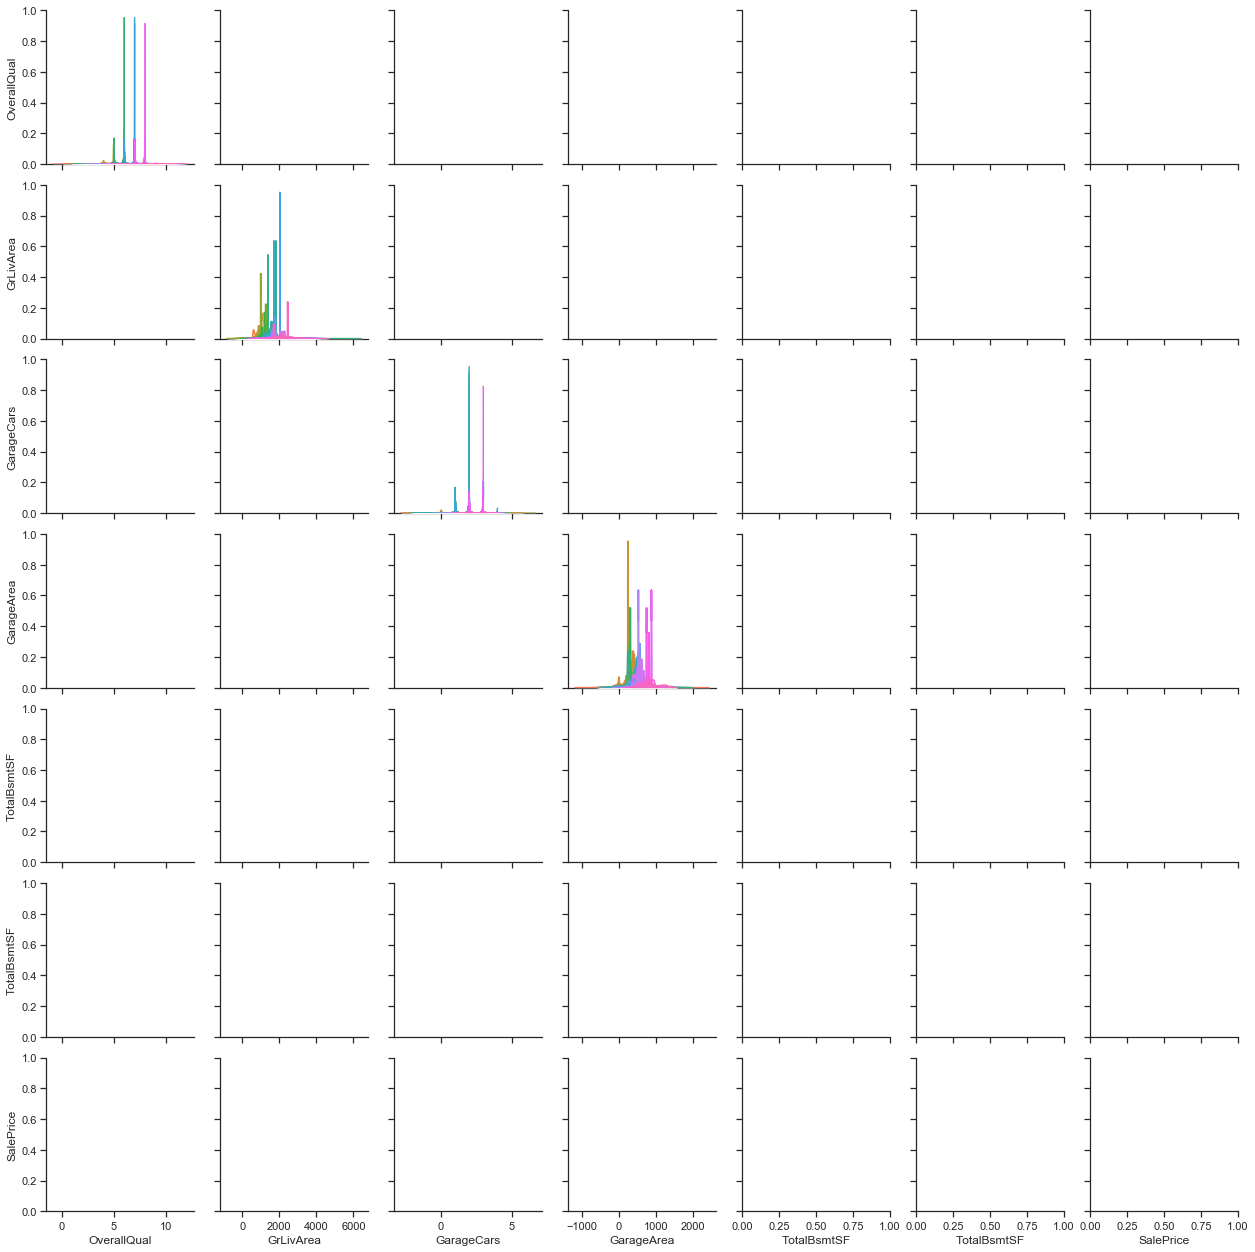

In [7]:
# df= sns.load_dataset("df")
g = sns.pairplot(dataset, hue="SalePrice")

In [9]:


# Finding all the missing values in the dataset and then calculating the missing ratio of each feature
all_data = (df.isnull().sum() / len(df)) * 100
all_data = all_data.drop(all_data[all_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data})
missing_data.head(10)



,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageYrBlt,5.547945
GarageType,5.547945
GarageFinish,5.547945
GarageQual,5.547945


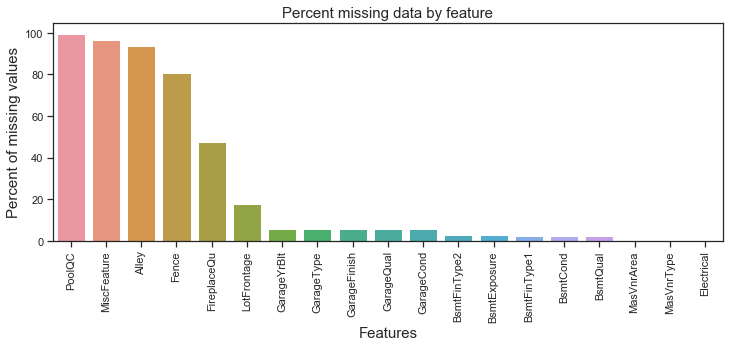

In [13]:
# Plotting the missing ratio of data by feature
f, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x=all_data.index, y=all_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.xticks(rotation='90')
plt.show()

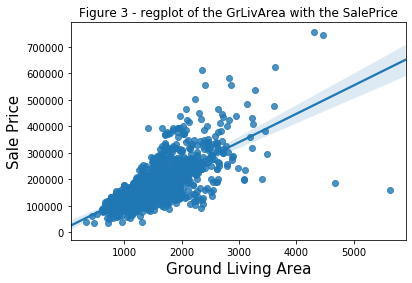

In [12]:
# regplot of GrLivArea/SalePrice
ax = sns.regplot(x=df['GrLivArea'], y=df['SalePrice'])
plt.ylabel('Sale Price', fontsize= 15)
plt.xlabel('Ground Living Area', fontsize= 15)
plt.title('Figure 3 - regplot of the GrLivArea with the SalePrice', fontsize= 12)
plt.show()

In [17]:
df["PoolQC"].isnull().sum()

1453

In [21]:
df["PoolQC"].unique()

array(['None', 'Ex', 'Fa', 'Gd'], dtype=object)

In [19]:
df["PoolQC"] = df["PoolQC"].fillna("None")

In [20]:
df["PoolQC"].isnull().sum()

0

In [24]:
df["MiscFeature"].unique()

array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [25]:
df["MiscFeature"].isnull().sum()

1406

In [30]:
df["MiscFeature"] = df["MiscFeature"].fillna("None")
df["MiscFeature"].isnull().sum()

0

In [32]:
#LandSlope: Slope of property
landslope_map = {'Gtl':'6','Mod':'4','Sev':'2'}
data_aux.LandSlope = data_aux.LandSlope.map(landslope_map)
data_aux.LandSlope = data_aux.LandSlope.astype('int64')

NameError: name 'data_aux' is not defined


# There are 6965  cells with Nan value. Cleaning


Try to represent the NAN columns visually and replace the Na Values by 0, 1 where possible - TBC

## Part 1.4 - Explore "SalePrice" Column


    Skewness
        It is the degree of distortion from the symmetrical bell curve or the normal distribution. It measures the lack of symmetry in data distribution. It differentiates extreme values in one versus the other tail. A symmetrical distribution will have a skewness of 0.
    Kurtosis
        Kurtosis is all about the tails of the distribution — not the peakedness or flatness. It is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution.


In [13]:
print('Skewness: %f' % df['SalePrice'].skew())
print('Kurtosis: %f' % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [14]:
df.SalePrice.describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

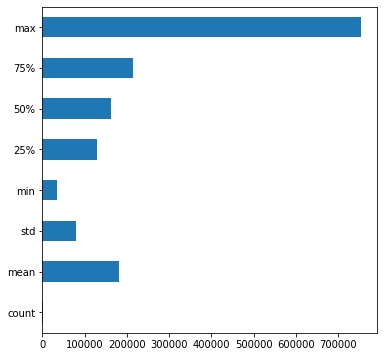

In [15]:
df.SalePrice.describe().plot.barh(figsize=(6,6), fontsize=10)

## Part 1.5- Look on all the numeric columns

In [16]:
# sns.pairplot later
# # Try to scatter multiple linear regression later

## Part 1.7 - MSZoning column exploration. How the price of the Sales depends on the classification of the zone

MSZoning: Identifies the general zoning classification of the sale.
       C	Commercial.
       FV	Floating Village Residential. 
       RH	Residential High Density.
       RL	Residential Low Density.
       RM	Residential Medium Density.

In [18]:
ZonesTable=df.groupby('MSZoning', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [19]:
ZonesTable

,Minimum,Maximum,Average
MSZoning,,,
C (all),34900,133900,74528.000000
RM,37900,475000,126316.830275
RH,76000,200000,131558.375000
RL,39300,755000,191004.994787
FV,144152,370878,214014.061538


In [20]:
ZonesTable.iplot(kind='bar', xTitle='Zoning Classification', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Zone Classification', filename='bar-direct-labels')

The highest minimum and average is noticed in FV Floating Village Residential, as well as in the "
RL Residential Low Density".  SalePrice in C Commercial classified zones are lowest.

## Part 1.8 - Neighborhood

In [21]:
df.groupby('Neighborhood')['MSZoning'].value_counts()

Neighborhood  MSZoning
Blmngtn       RL           16
              RM            1
Blueste       RM            2
BrDale        RM           16
BrkSide       RM           30
              RL           28
ClearCr       RL           28
CollgCr       RL          140
              RM           10
Crawfor       RL           46
              RM            3
              RH            2
Edwards       RL           90
              RM            8
              RH            2
Gilbert       RL           79
IDOTRR        RM           28
              C (all)       9
MeadowV       RM           17
Mitchel       RL           44
              RM            5
NAmes         RL          223
              RH            2
NPkVill       RL            9
NWAmes        RL           73
NoRidge       RL           41
NridgHt       RL           76
              RM            1
OldTown       RM           95
              RL           17
              C (all)       1
SWISU         RL           20
              RH 

In [22]:
NeighbTable=df.groupby('Neighborhood', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean).sort_values(by='Average')

In [23]:
NeighbTable.iplot(kind='bar', xTitle='Neighborhood Impact', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by Neighborhood', filename='bar-direct-labels')

Chic neighborhood noticed to be Somerst=Somerset with FV=38 and RL=21 dwellings sold at higher average prices.
StoneBr = Stone Brook is classified as RL zone with only 13 dwellings sold, but with the highest average price.
NridgHt =Northridge Heights= RL with 55 is Number 2.

## Part 1.9 - Overall Condition

There majority of sells are in conditions 5 - Average and 6 - Above Average.
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

Text(0, 0.5, 'Count')

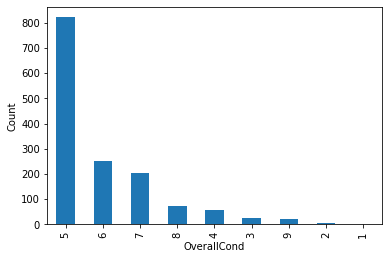

In [24]:
df['OverallCond'].value_counts().plot(kind='bar')
plt.xlabel('OverallCond')
plt.ylabel('Count')

In [25]:
OverallCondition=df.groupby('OverallCond', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean)

In [26]:
OverallCondition.iplot(kind='bar', xTitle='OverallCondition Impact', yTitle='Sale Price', 
           title='Minimum, Maximum and Average Prices by OverallCondition', filename='bar-direct-labels')

#### Strangely the dwellings rated at 5 and 6 position - have the Maximum higher than 7-9?


## Part 1.10 - Year of transaction and Prices

In [27]:
YrSold=df.groupby('YrSold', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean)

In [28]:
YrSold.head()

,Minimum,Maximum,Average
YrSold,,,
2006,35311,625000,182549.458599
2007,39300,755000,186063.151976
2008,40000,446261,177360.838816
2009,34900,582933,179432.103550
2010,55000,611657,177393.674286


In [29]:
YrSold.iplot(kind='bar', xTitle='YrSold', yTitle='SalePrice')

## Part 1.11 - Lot size and the price correspondingly

### Vizualized the most common lot size and the prices
##### LotArea: Lot size in square feet. 

## Part 1.10 - Base parameters

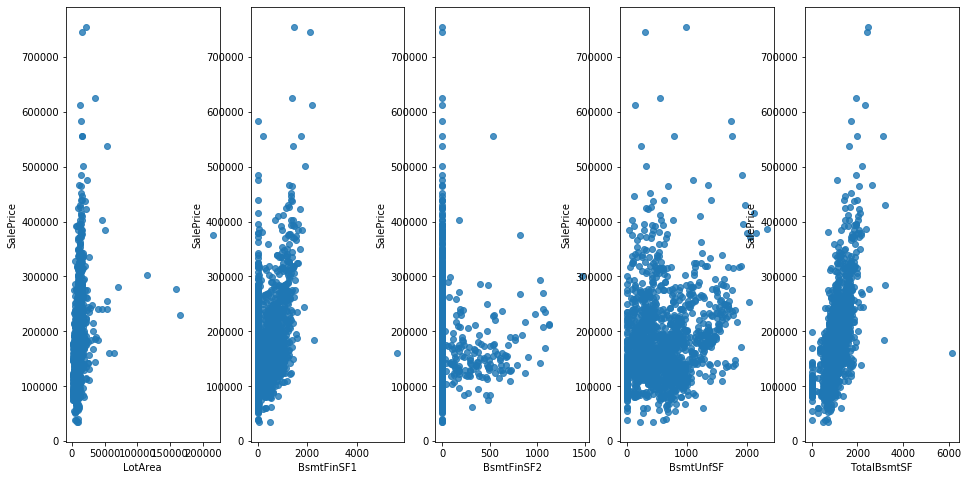

In [30]:
#To change the X
cols=['LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']
to=df[cols]
fig,axes = plt.subplots(figsize = (16,8), nrows = 1, ncols = 5)
for i in range(5):
    plt.sca(axes[i])
    plt.scatter(to.iloc[:,i],to['SalePrice'], alpha = 0.8)
    plt.xlabel(to.iloc[:,i].name)
    plt.ylabel('SalePrice')

In [50]:
# from pandas.tools.plotting import radviz
# columns = ['SalePrice','OverallQual','TotalBsmtSF','GrLivArea','GarageArea','FullBath','YearBuilt','YearRemodAdd']
# radviz(train[columns], "OverallQual")
# to try later

# Part 2 - Compute field relationship scores with the chosen statistical model.

In [ ]:
df.boxplot("SalePrice", by="MSZoning", figsize=(20,6))

In [ ]:
df.head()

In [ ]:
model = ols('SalePrice ~ YrSold + C(OverallCond)+ C(MSSubClass)+ C(LotArea)+ C(MSZoning)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

In [ ]:
model.summary()

In [ ]:
# X = df[['MSZoning']] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
# Y = df['MSSubClass']

# X = sm.add_constant(X) # adding a constant

# model = sm.OLS(Y, X).fit()
# predictions = model.predict(X) 

# print_model = model.summary()
# print(print_model)

In [ ]:
# stats.f_oneway(*df['OverallCond'])

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = df.select_dtypes(include=numerics)

In [ ]:
newdf

In [ ]:
Matched Pairs Test
is thre a significant difference between Surface/LotArea/OverallCondition/Overall Quality vs SalePrice mean?
Our hypothesis is that the Size of the Lot or Quality has incidence on the price
Used ttest_rel function from scipy.stats.
Compare the two columns to see if there is a statistically significant difference between them.

In [ ]:
# Rechecked first the type of the columns:
print('OverallQual type:', df.OverallQual.dtypes)
print('OverallCond type:', df.OverallCond.dtypes)
print('LotArea type:', df.LotArea.dtypes)
print('TotalBsmtSF type:', df.TotalBsmtSF.dtypes)

stats.ttest_rel(df['TotalBsmtSF'],df['SalePrice'], axis=0)

Null Hyp rejected. The values means cannot be considered to be compared to means of the SalePrice.
pvalue is 0.
Matched Pair Test is not adapted here.

In [ ]:
newdf.sort_values('SalePrice').tail(1) #outlier with sold price 755k has index 691 or ID 692

In [ ]:
YrSold=df.groupby('YrSold', as_index=True)['SalePrice'].agg(Minimum=np.min, Maximum=np.max, Average=np.mean)
YrSold